# Problem 1 
In this problem, you are asked to write a report to summarize your analysis of the popular “Auto MPG” data set in the literature. Much research has been done to analyze this data set, and here the objective of our analysis is to predict whether a given car gets high or low gas mileage based 7 car attributes such as cylinders, displacement, horsepower, weight, acceleration, model year and origin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## (a) Read Data

Data source is critical because we could not analyze artificial data. So we will briefly introduce data sources.
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
The dataset was used in the 1983 American Statistical Association 

In [2]:
df = pd.read_csv("Auto.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.shape

(392, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


### Dataset Description

* mpg: Miles per gallon (Continuous variable) 
* cylinders: Power unit of an engine (Categorical variable)
* displacement: Combined swept volume of the pistons inside the cylinders of an engine(Continuous variable)
* horsepower: Power an engine produces(Continuous variable)
* weight: mass of a vehicle (Continuous variable)
* acceleration: the rate of change of the velocity of a car (Continuous variable)
* year: the time taken after a car is made (Discrete variable)
* origin: 1 is a car made in america, 2 in europe and 3 in asia or other part of the world (Categorical variable)

## (b) Cleaning Dataset
Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. 

In [6]:
median = np.median(df.loc[:, 'mpg'])
median

22.75

In [7]:
# create a method for mapping
def truefalse(col):
    if col <= 22.75:
        return 0
    else:
        return 1

In [8]:
df['mpg01'] = df.loc[:, 'mpg'].map(truefalse)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [9]:
#replace column mpg with mpg01
df_new = df.drop(columns = 'mpg')
df_new.head()
#rearrange column
cols = df_new.columns.tolist()
cols = cols[-1:] + cols[:-1]
#rearranged columns
df_new = df_new[cols]
df_new.head()

,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,0,8,307.0,130,3504,12.0,70,1
1,0,8,350.0,165,3693,11.5,70,1
2,0,8,318.0,150,3436,11.0,70,1
3,0,8,304.0,150,3433,12.0,70,1
4,0,8,302.0,140,3449,10.5,70,1


## (c) Exploratory Data Analysis
* Explore the data graphically in order to investigate the association between mpg01 and the other features.
* Which of the other features seem most likely to be useful in predicting mpg01? 
* Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [10]:
df_new.describe()

,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.500000,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,0.500639,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,0.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,0.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,0.500000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,1.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,1.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


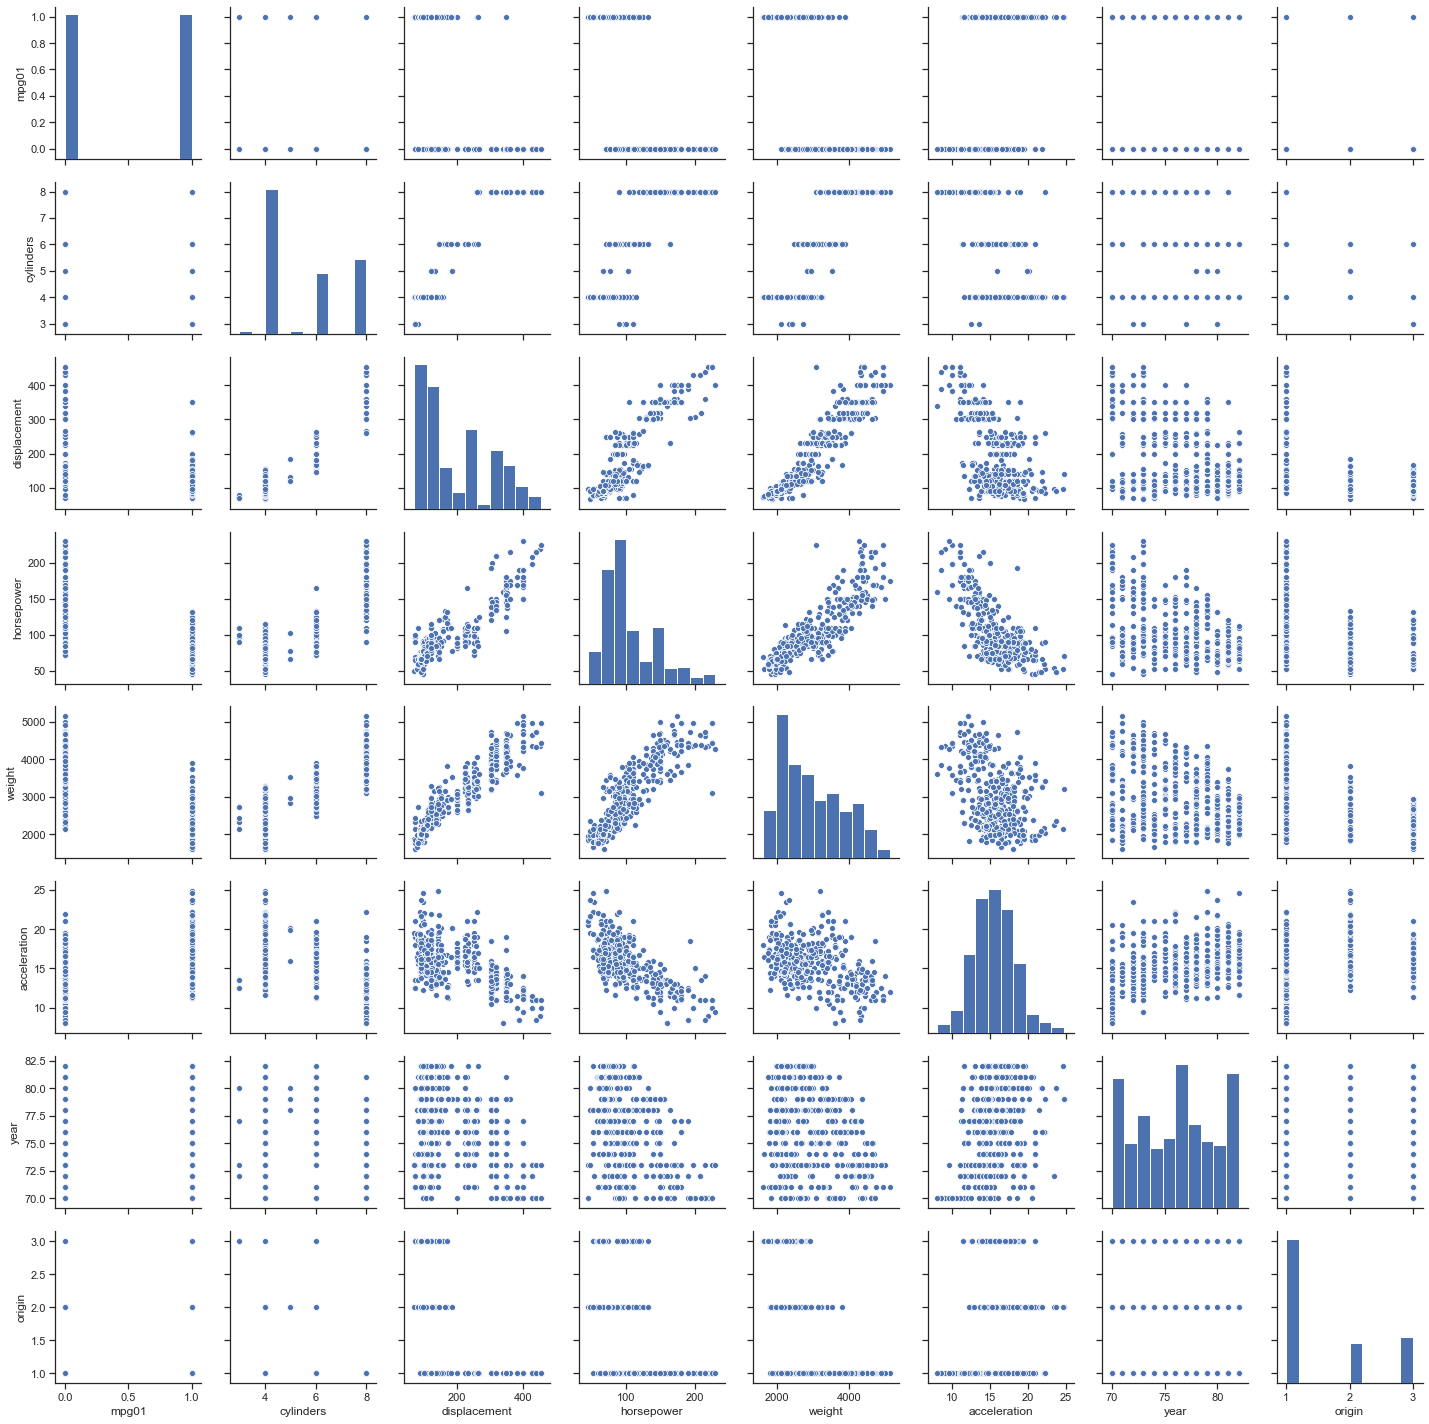

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_new)

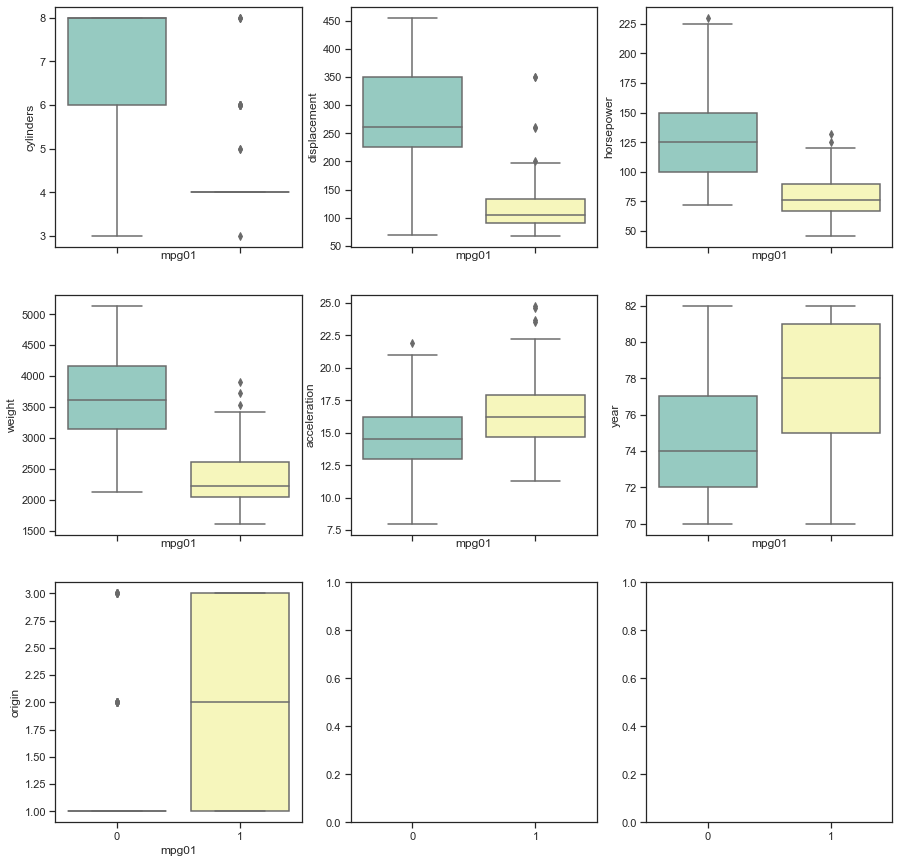

In [12]:
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)

cols = df_new.columns
row = 0
count = 0
for i in range(7):
    sns.boxplot(x = "mpg01", y = df_new.columns[i + 1], data=df_new, palette="Set3", ax = axes[row, (i + 3) % 3])
    count += 1
    if (count == 3):
        count = 0
        row += 1

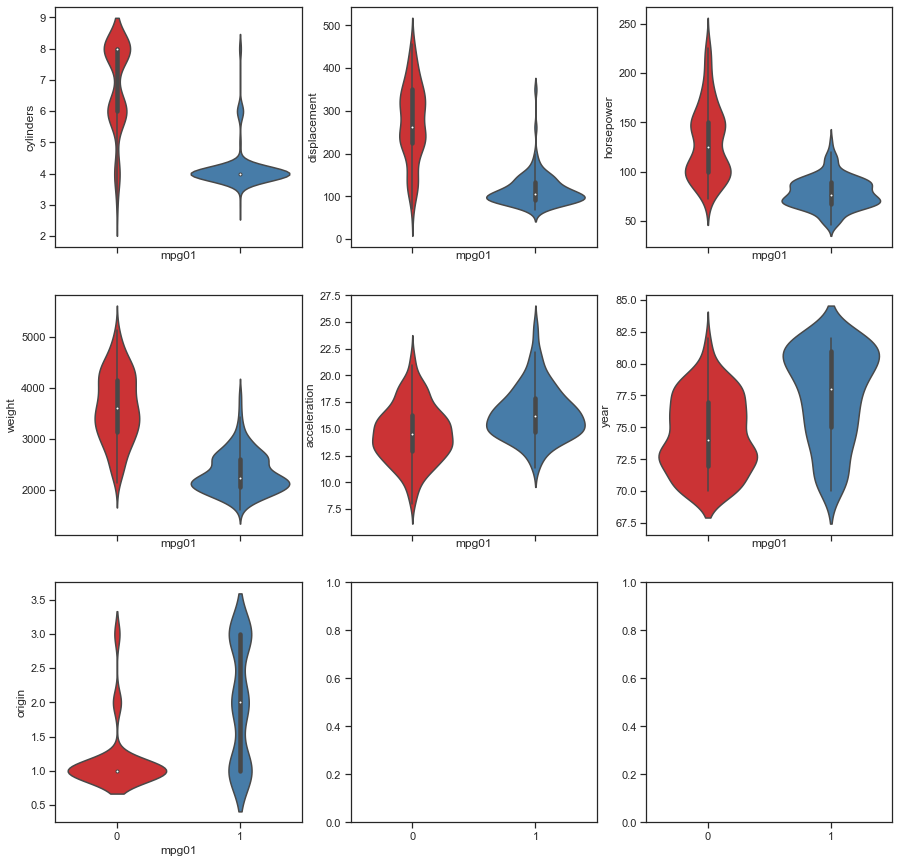

In [13]:
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)

cols = df_new.columns
row = 0
count = 0
for i in range(7):
    sns.violinplot(x = "mpg01", y = df_new.columns[i + 1], data=df_new,palette='Set1', ax = axes[row, (i + 3) % 3])
    count += 1
    if (count == 3):
        count = 0
        row += 1

## (d) Dataset Split
Now we will split our dataset into training and testing examples. We use the train_test_split method in scikit-learn package to split the dataset. For this method, it will randomly select some of data points to derive the training and testing dataset.

In scikit-learn package, the method's description is, *\"Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner."*

In [14]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['mpg01'], axis = 1)
y = df_new["mpg01"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

## (e) Traing Model

Perform the following classification methods on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (c). 
What is the test error of the model obtained?
1. LDA 
2. QDA 
3. Naive Bayes 
4. Logistic Regression
5. KNN with several values of K. Use only the variables that seemed most associated with mpg01 in (c). Which value of K seems to perform the best on this data set?

In [18]:
# create dataframe that some of features have association with mpg
X_train = X_train.loc[:,['displacement', 'horsepower', 'weight', 'acceleration']]
X_test = X_test.loc[:,['displacement', 'horsepower', 'weight', 'acceleration']]

### LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.fit(X_train, y_train).predict(X_test)

trainError = clf.fit(X_train, y_train).predict(X_train)
print("LDA Training Error:", np.mean(trainError != y_train))
print("LDA Testing Error:", np.mean(y_pred_lda != y_test))

LDA Training Error: 0.08394160583941605
LDA Testing Error: 0.16101694915254236


### QDA

In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred_qda = qda.fit(X_train, y_train).predict(X_test)

QtrainError = qda.fit(X_train, y_train).predict(X_train)
print("QDA Training Error:", np.mean(QtrainError != y_train))
print("QDA Testing Error:", np.mean(y_pred_qda != y_test))

QDA Training Error: 0.08394160583941605
QDA Testing Error: 0.1694915254237288


### Naive Bayes 

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)

NBtrainError = gnb.fit(X_train, y_train).predict(X_train)
print("Naive Bayses Training Error:", np.mean(NBtrainError != y_train))
print("Naive Bayses Testing Error:", np.mean(y_pred_NB != y_test))

Naive Bayses Training Error: 0.09854014598540146
Naive Bayses Testing Error: 0.1694915254237288


### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
lgr_y_pred = lgr.predict(X_test)

LgrError = lgr.fit(X_train, y_train).predict(X_train)
print("Logistic Training Error:", np.mean(LgrError != y_train))
print("Logistic Testing Error:", np.mean(lgr_y_pred != y_test))

Logistic Training Error: 0.09854014598540146
Logistic Testing Error: 0.13559322033898305


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### KNN

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
df_feat = pd.DataFrame(scaled_features, columns = X_train.columns)
df_feat.head()

,displacement,horsepower,weight,acceleration
0,-0.854863,-0.285913,-0.725403,0.342749
1,0.031360,-0.522352,-0.477029,0.167473
2,-0.748902,-0.338455,-0.659727,-0.183081
3,0.021727,-0.390997,-0.404188,-0.183081
4,0.513002,-0.128287,0.417358,0.518026


In [71]:
scaler_test = StandardScaler()
scaler_test.fit(X_test)
scaled_features_test = scaler.transform(X_test)
df_feat_test = pd.DataFrame(scaled_features_test, columns = X_test.columns)
df_feat_test.head()

,displacement,horsepower,weight,acceleration
0,-0.970458,-0.942688,-0.952283,0.868580
1,-0.729636,0.265778,-0.228654,0.062306
2,-1.018622,-1.179127,-1.416791,0.307694
3,-1.018622,-0.916417,-1.231705,1.744964
4,-0.546612,-0.496081,-0.234625,0.027251


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(df_feat,y_train)
pred_knn = knn.predict(df_feat_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_knn))

[[51 14]
 [ 0 53]]


In [88]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        65
           1       0.79      1.00      0.88        53

    accuracy                           0.88       118
   macro avg       0.90      0.89      0.88       118
weighted avg       0.91      0.88      0.88       118



Text(0, 0.5, 'Error Rate')

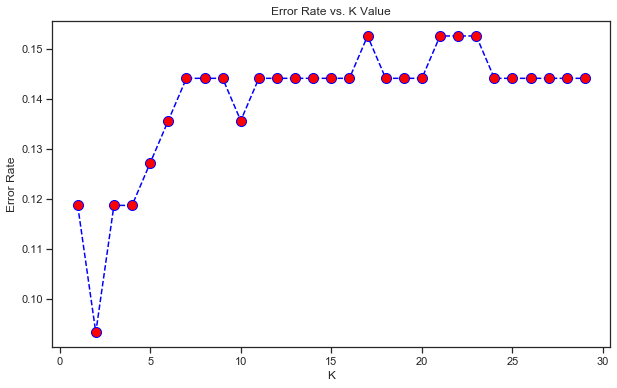

In [93]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_feat,y_train)
    pred_i = knn.predict(df_feat_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(df_feat,y_train)
pred_k1 = knn.predict(df_feat_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred_k1))
print('\n')
print(classification_report(y_test,pred_k1))

WITH K=1


[[49 16]
 [ 1 52]]


              precision    recall  f1-score   support

           0       0.98      0.75      0.85        65
           1       0.76      0.98      0.86        53

    accuracy                           0.86       118
   macro avg       0.87      0.87      0.86       118
weighted avg       0.88      0.86      0.86       118



In [91]:
# NOW WITH K=2
knn_2 = KNeighborsClassifier(n_neighbors=2)

knn_2.fit(df_feat,y_train)
pred_2 = knn_2.predict(df_feat_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred_2))
print('\n')
print(classification_report(y_test,pred_2))

WITH K=2


[[54 11]
 [ 0 53]]


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        65
           1       0.83      1.00      0.91        53

    accuracy                           0.91       118
   macro avg       0.91      0.92      0.91       118
weighted avg       0.92      0.91      0.91       118

